In [2]:
# Import necessary libraries
import os
os.chdir("C:/Users/Pauli/OneDrive/Dokumente/Uni/Masterarbeit/code/preprocessing")
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ast 
#import data
feature_set_kinase = "Pocket_Sequences_propy"   # "Sequences_propy" or "Pocket_Sequences_propy"
df_kinase = pd.read_excel("ligand_and_kinase_features_data.xlsx", sheet_name="Kinase_"+feature_set_kinase)
df_target_value = pd.read_excel("kinase_ligand_k_off.xlsx", sheet_name='kinase_ligand_k_off')
df_target_value = df_target_value.dropna(subset=["log_koff"])  #drop rows with missing target value

In [3]:
def parse_list_cell(x):
    if pd.isna(x):
        return None
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)   # safe parsing of stringified list
        except Exception:
            return None
    return x  # already a list/sequence

In [6]:
df_target_value

,Unnamed: 0,kinase,ligand,k_off,log_koff
0,0,ABL,AEE788 (NVP-AEE788),0.155100,-0.809388
1,1,ABL,Afatinib (BIBW2992),0.377400,-0.423198
2,2,ABL,AG-1024,0.224100,-0.649558
3,3,ABL,AG-1478 (Tyrphostin AG-1478),0.194850,-0.710300
4,4,ABL,AMG 900,0.041410,-1.382895
...,...,...,...,...,...
3405,3405,TRKB,Vandetanib (Zactima),0.060430,-1.218747
3406,3406,TRKB,VX-680 (MK-0457 - Tozasertib),0.543300,-0.264960
3407,3407,TRKB,WZ3146,0.440800,-0.355758
3408,3408,TRKB,WZ8040,0.076580,-1.115885


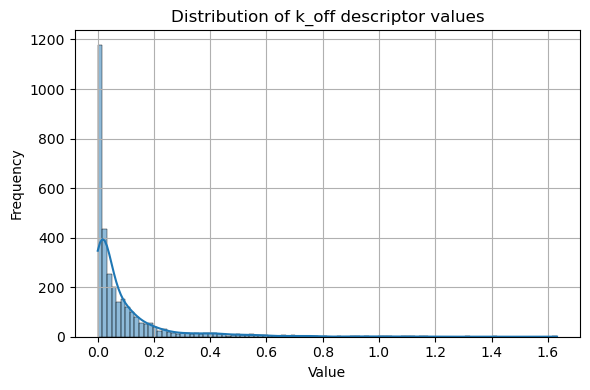

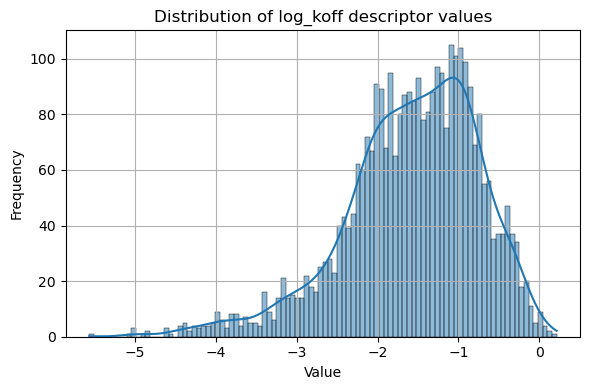

In [10]:
#plot the distribution of k_off and log_koff

choice= ["k_off", "log_koff"]

for i in choice:
    all_values= np.array(df_target_value[i])
    

    plt.figure(figsize=(6, 4))
    sns.histplot(all_values, bins=100, kde=True)
    plt.title(f"Distribution of {i} descriptor values")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()



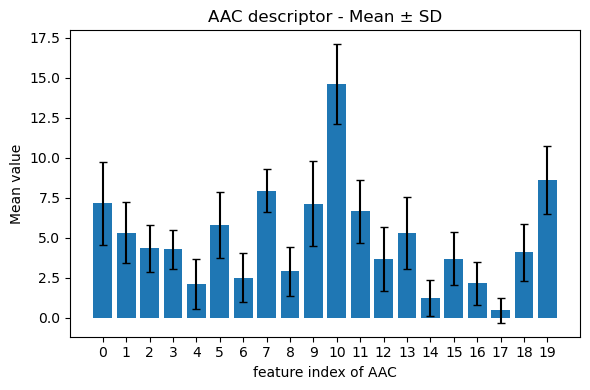

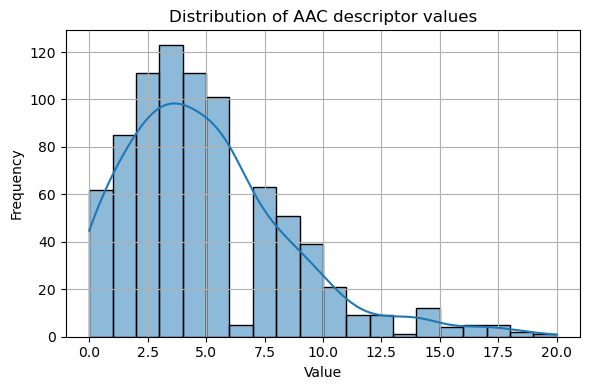

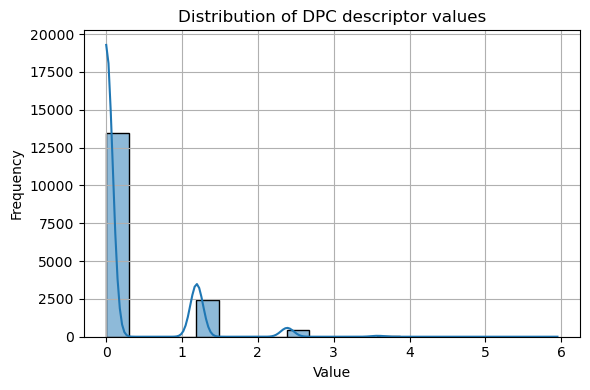

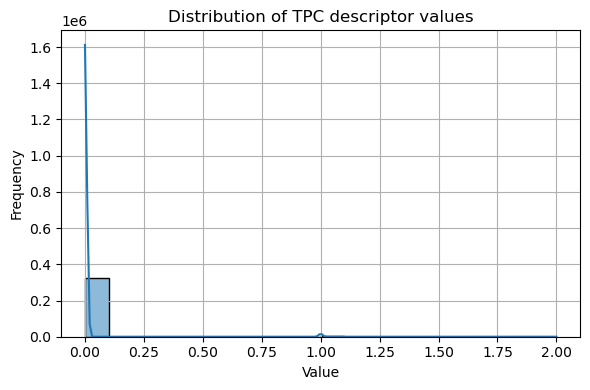

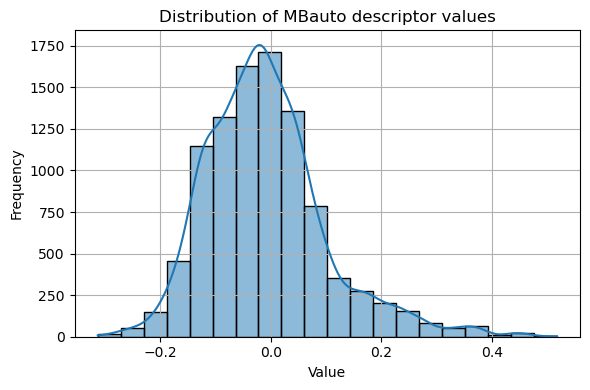

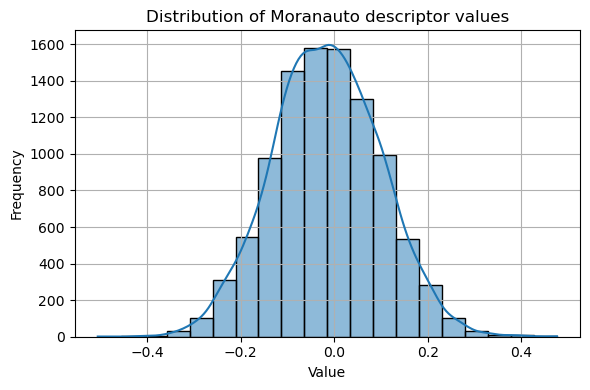

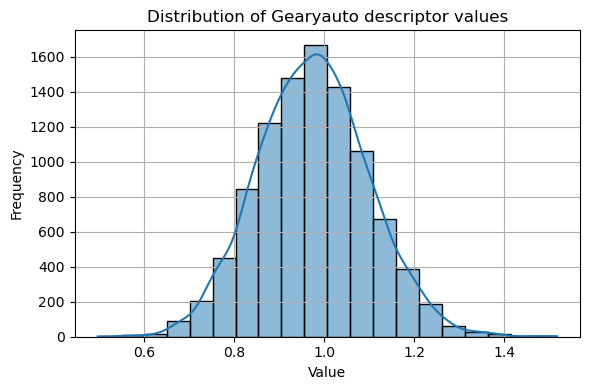

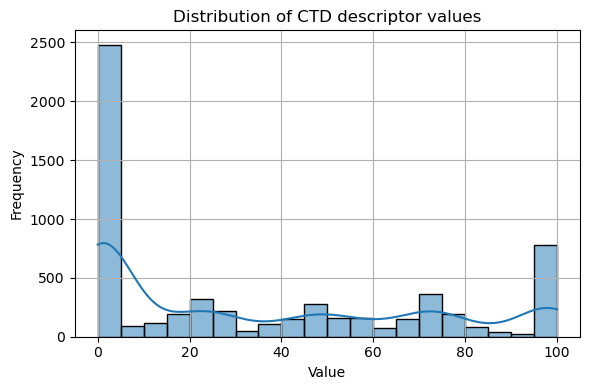

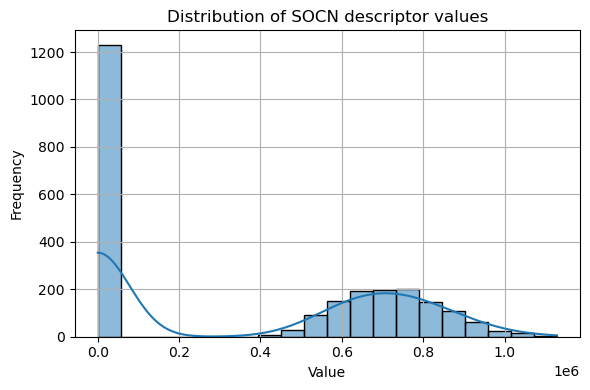

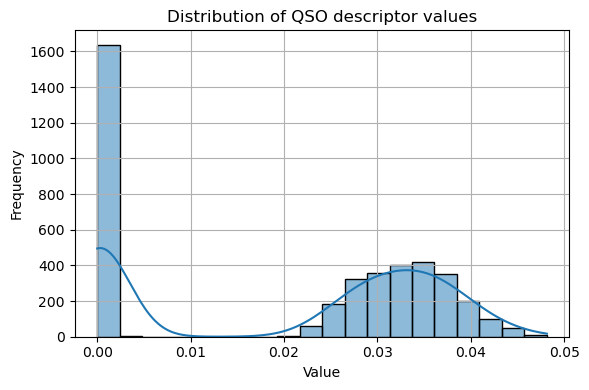

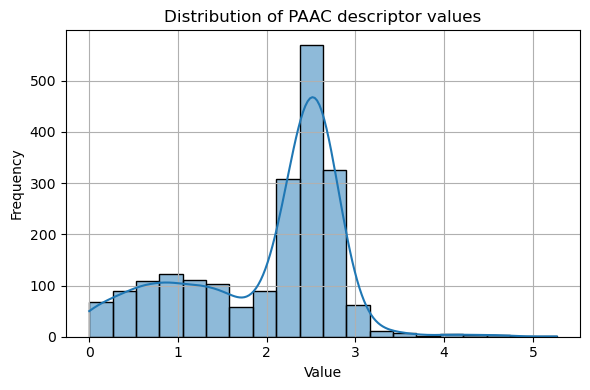

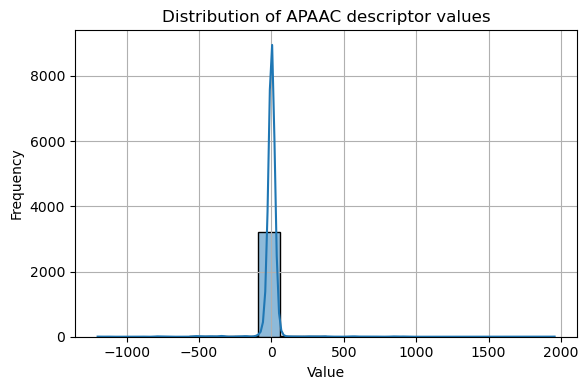

In [38]:
pd.options.display.precision = 3

extra_features = ["AAC", "DPC", "TPC", "MBauto", "Moranauto",
                  "Gearyauto", "CTD", "SOCN", "QSO", "PAAC", "APAAC"]

#build 2d array
arr = np.vstack(df_kinase["AAC"].apply(parse_list_cell).values).astype(float)   # shape (n_samples, n_features)
means = arr.mean(axis=0)
stds  = arr.std(axis=0)


    
plt.figure(figsize=(6, 4.))
idx = np.arange(arr.shape[1])
plt.bar(idx, means, yerr=stds, capsize=3)
plt.xticks(idx, [str(i) for i in idx])
plt.xlabel("feature index of AAC")
plt.ylabel('Mean value')
plt.title('AAC descriptor - Mean ± SD')
plt.tight_layout()
plt.show()

for i in extra_features:
    s= df_kinase[i].apply(parse_list_cell).dropna()
    all_values = np.concatenate(s.to_numpy())
    

    plt.figure(figsize=(6, 4))
    sns.histplot(all_values, bins=20, kde=True)
    plt.title(f"Distribution of {i} descriptor values")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
